Click [here]() to access the associated Medium article.

# Setup

In [1]:
!pip install -q numpy pandas matplotlib

In [2]:
import string
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Set it to True to save the figures in the "image" folder.
SAVE_IMAGES = False

if SAVE_IMAGES:
    # Make sure the "image" folder exists.
    image_path = Path("image")
    image_path.mkdir(exist_ok=True)

# Plot style
plt.style.use("ggplot_classic.mplstyle")

# Seed for reproducibility
SEED = 7

# Inappropriate Use of Pie charts

**The Piftall:** A common error that many make is to use pie charts when there are too many categories. Pie charts work best when there's only a few categories to compare. Otherwise, the chart looks cluttered and doesn't vindicate the cause of visualisation.

**The Fix:** For better readability and efficient information delivery, we can use a bar chart.

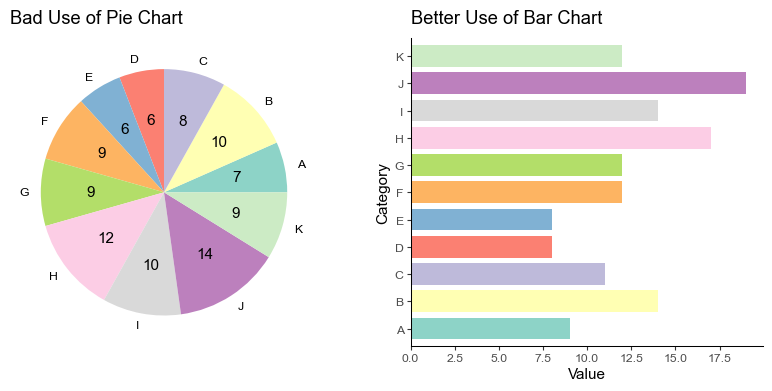

In [3]:
# Data
np.random.seed(SEED)  # set random seed for reproducibility
n_cat = 11  # number of categories

df = pd.DataFrame(
    {
        "Category": list(string.ascii_uppercase[:n_cat]),
        "Value": np.random.randint(5, 20, n_cat),
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot.pie(
    y="Value",
    labels=df["Category"],
    autopct="%.0f",
    colors=plt.cm.Set3.colors,
    title="Bad Use of Pie Chart",
    ylabel="",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot.barh(
    x="Category",
    y="Value",
    width=0.8,
    color=plt.cm.Set3.colors,
    title="Better Use of Bar Chart",
    xlabel="Value",
    legend=False,
    ax=ax[1],
)

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "pie.png", bbox_inches="tight", dpi=200)

plt.show()

# Misleading Y-axis

**The Piftall:** Manipulating the y-axis to emphasize a minor change is a common issue. This can mislead the viewer into assuming a greater difference than there actually is.

**The Fix:** Ensure y-axis scaling accurately represents the data, avoiding exaggeration or understatement. Start from zero, if possible, for clarity.

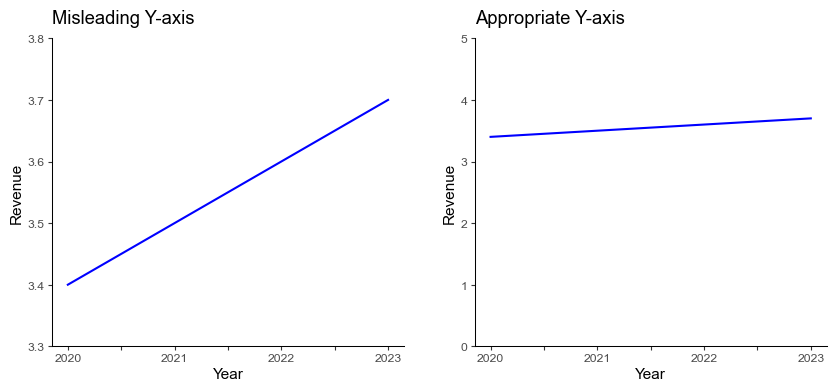

In [4]:
# Data
df = pd.DataFrame(
    {
        "Year": ["2020", "2021", "2022", "2023"],
        "Revenue": [3.4, 3.5, 3.6, 3.7],
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot(
    x="Year",
    y="Revenue",
    color="blue",
    ylim=(3.3, 3.8),
    title="Misleading Y-axis",
    ylabel="Revenue",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot(
    x="Year",
    y="Revenue",
    color="blue",
    ylim=(0, 5),
    title="Appropriate Y-axis",
    ylabel="Revenue",
    legend=False,
    ax=ax[1],
)

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "y_ax.png", bbox_inches="tight", dpi=200)

plt.show()

# Overcomplication of Plot Designs

**The Piftall:** Sometimes, we try to create aesthetically striking visualizations and end up overcomplicating the design. This can result in the dampening of the information we were trying to convey.

**The Fix:** Instead, we could settle for straightforward designs that are easy-to-follow, using neat colors.

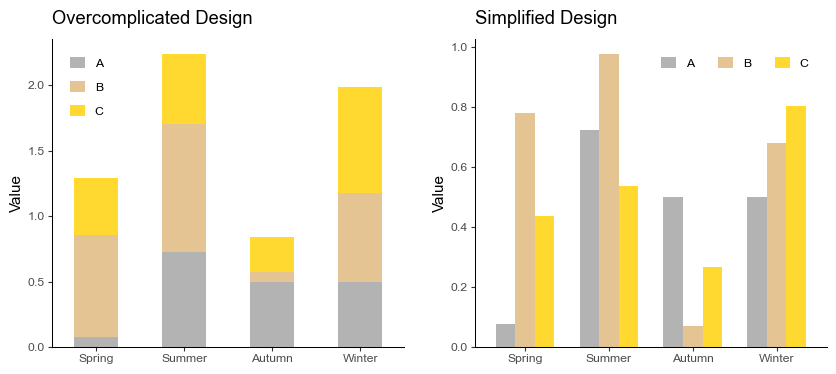

In [5]:
# Data
np.random.seed(SEED)
n_columns = 3

df = pd.DataFrame(
    np.random.rand(4, n_columns),
    columns=list(string.ascii_uppercase[:n_columns]),
    index=["Spring", "Summer", "Autumn", "Winter"],
)

# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot.bar(
    stacked=True,
    rot=0,
    color=plt.cm.Set2_r.colors,
    title="Overcomplicated Design",
    ylabel="Value",
    ax=axs[0],
)

# Good Example
df.plot.bar(
    width=0.7,
    rot=0,
    color=plt.cm.Set2_r.colors,
    title="Simplified Design",
    ylabel="Value",
    ax=axs[1],
).legend(loc="upper right", ncol=3)

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "stacked.png", bbox_inches="tight", dpi=200)

plt.show()

# Ignoring Scale Differences

**The Piftall:** We often overlook the scale of different variables while plotting them in the same graph, which can lead to the misrepresentation of data.

**The Fix:** We might want to plot separate graphs or use secondary y-axis for variables with different scales.

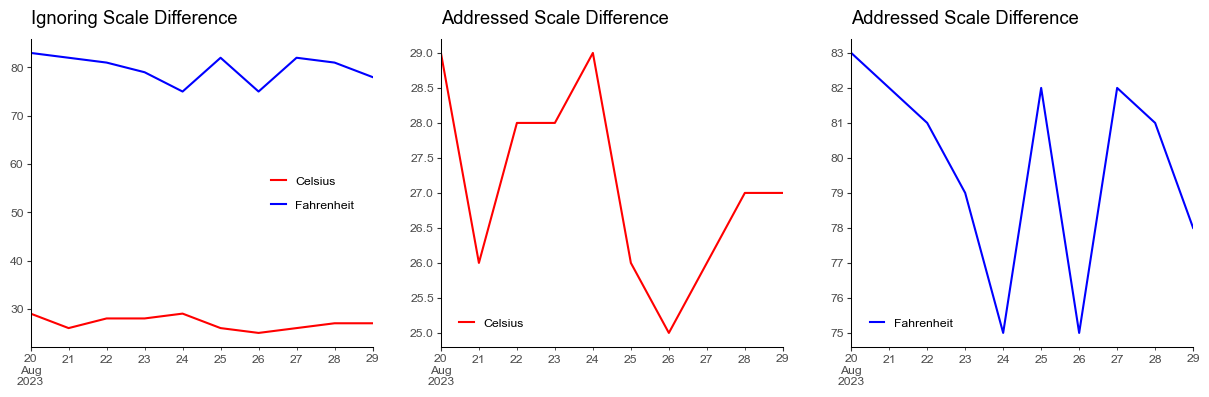

In [6]:
# Data
np.random.seed(SEED)
n_points = 10

df = pd.DataFrame(
    {
        "Celsius": np.random.randint(25, 31, n_points),
        "Fahrenheit": np.random.randint(75, 85, n_points),
    },
    index=pd.date_range(start="2023-08-20", periods=n_points, freq="D"),
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Bad Example
df.plot(title="Ignoring Scale Difference", color=["red", "blue"], ax=ax[0])

# Good Example
df["Celsius"].plot(
    title="Addressed Scale Difference",
    color="red",
    ax=ax[1],
).legend(loc="lower left")

df["Fahrenheit"].plot(
    title="Addressed Scale Difference",
    color="blue",
    ax=ax[2],
).legend(loc="lower left")

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "scale.png", bbox_inches="tight", dpi=200)

plt.show()

# Unconsidered use of 3D Plots

**The Piftall:** While 3D plots might seem like a good idea to represent a third variable, it often leads to misinterpretation and confusion. This is exacerbated if the view angle hides important details.

**The Fix:** Instead, 2D scatter plots with color encoding for the 3rd dimension often work better.

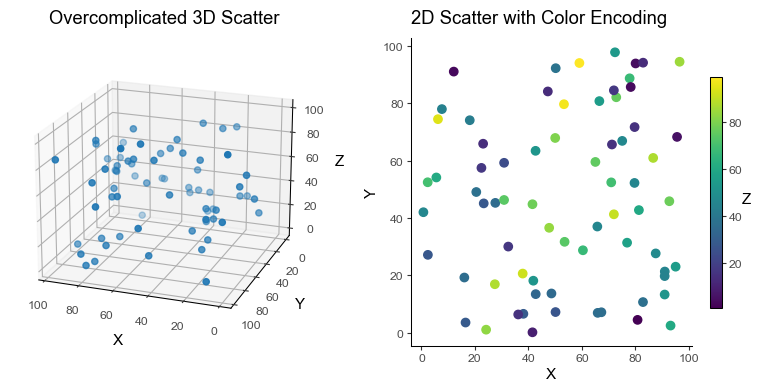

In [7]:
# Data
np.random.seed(SEED)

df = pd.DataFrame(np.random.rand(70, 3) * 100, columns=["X", "Y", "Z"])

# Plot
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122)

# Bad Example
ax0.scatter(df["X"], df["Y"], df["Z"])
ax0.view_init(elev=20, azim=110, roll=0)
ax0.set(
    title="Overcomplicated 3D Scatter",
    xlabel="X",
    ylabel="Y",
    zlabel="Z",
)

# Good Example
scatter = ax1.scatter(df["X"], df["Y"], c=df["Z"])
ax1.set(title="2D Scatter with Color Encoding", xlabel="X", ylabel="Y")
fig.colorbar(scatter, shrink=0.75, label="Z").set_label("Z", rotation=0)

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "3d.png", bbox_inches="tight", dpi=200)

plt.show()

# Overplotting

**The Piftall:** While trying to visualize a large amount of data, we sometimes end with overplotting. This happens when data points overlap each other and obscure the view.

**The Fix:** We can use techniques like transparency, jitter, or even better, a 2D density plot.

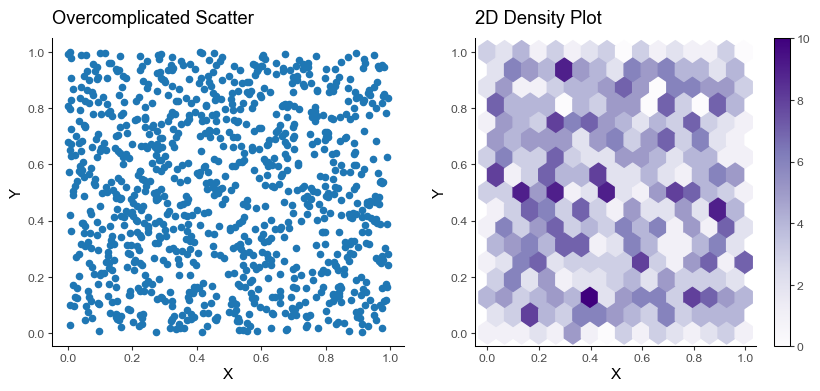

In [8]:
# Data
np.random.seed(SEED)

df = pd.DataFrame(np.random.rand(1000, 2), columns=["X", "Y"])

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot.scatter(x="X", y="Y", title="Overcomplicated Scatter", ax=ax[0])

# Good Example
num_hexagons = 15  # no. hexagons in x-axis. The more, the finer the grid.

df.plot.hexbin(
    x="X",
    y="Y",
    gridsize=num_hexagons,
    cmap="Purples",
    title="2D Density Plot",
    ax=ax[1],
)

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "overplotting.png", bbox_inches="tight", dpi=200)

plt.show()

# Not Emphasizing on What's Important

**The Piftall:** A pitfall comes when visualizing everything but not emphasizing what is important. We always want to highlight the most important aspects of our visualizations.

**The Fix:** The remedy here is to highlight what's important.

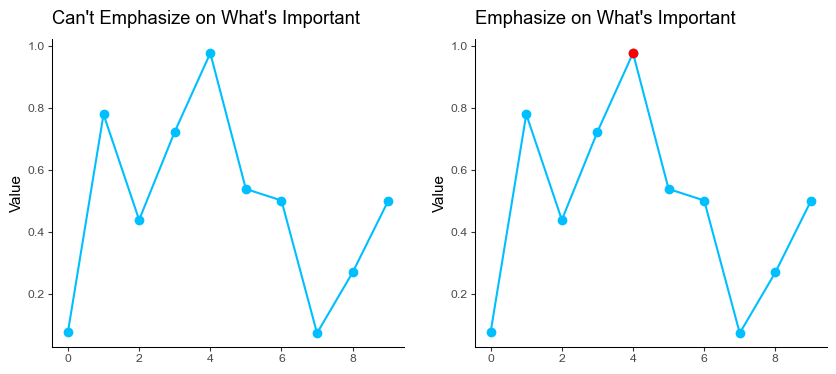

In [9]:
# Data
np.random.seed(SEED)

df = pd.DataFrame(np.random.rand(10, 1), columns=["Value"])

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot(
    title="Can't Emphasize on What's Important",
    ylabel="Value",
    marker="o",
    color="deepskyblue",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot(
    title="Emphasize on What's Important",
    ylabel="Value",
    marker="o",
    color="deepskyblue",
    legend=False,
    ax=ax[1],
)

important_idx = np.argmax(df["Value"])  # index of the important point
ax[1].plot(important_idx, df.iloc[important_idx], color="red", marker="o")

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "emphasize.png", bbox_inches="tight", dpi=200)

plt.show()

# Improper use of Line charts for Discrete Data

**The Piftall:** The line chart connects data points with a line implying a smooth continuity in the data which is often incorrect for discrete categories.

**The Fix:** We replace line charts with bar charts which are efficient for comparative analysis as well as presenting discrete data. It's important to select the right chart type when visualizing data in order to accurately represent the data's story.

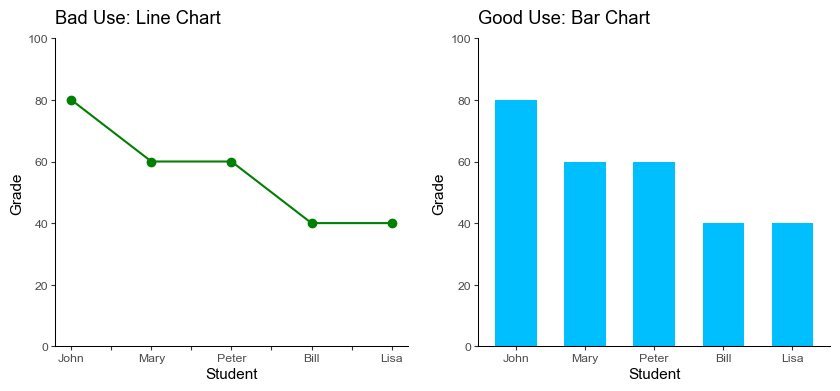

In [10]:
# Data
df = pd.DataFrame(
    {
        "student": ["John", "Mary", "Peter", "Bill", "Lisa"],
        "grade": [80, 60, 60, 40, 40],
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot(
    x="student",
    y="grade",
    ylim=(0, 100),
    marker="o",
    title="Bad Use: Line Chart",
    xlabel="Student",
    ylabel="Grade",
    color="green",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot.bar(
    x="student",
    y="grade",
    ylim=(0, 100),
    width=0.6,
    title="Good Use: Bar Chart",
    xlabel="Student",
    ylabel="Grade",
    color="deepskyblue",
    rot=0,
    legend=False,
    ax=ax[1],
)

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "line.png", bbox_inches="tight", dpi=200)

plt.show()

# Not Using Faceting for multidimensional data

**The Piftall:** Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. Plotting multiple dimensions in a single graph can overwhelm viewers and obscure patterns.

**The Fix:** Instead of plotting a line graph with six superposed lines, we can create six subplots with one subplot for each dimension.

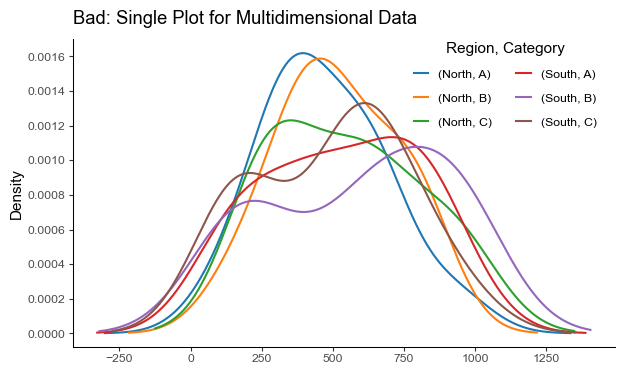

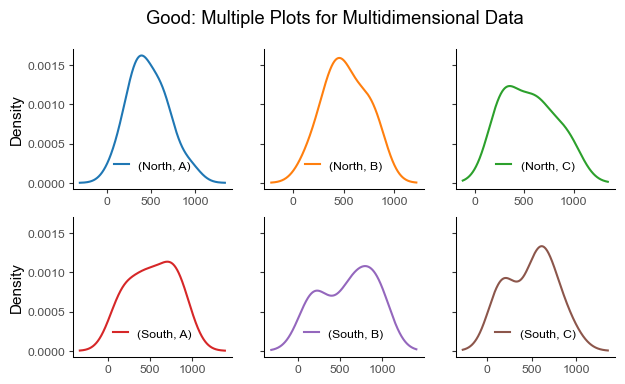

In [11]:
# Data
np.random.seed(SEED)

df = pd.DataFrame(
    {
        "Region": np.random.choice(["North", "South"], size=100),
        "Category": np.random.choice(["A", "B", "C"], size=100),
        "Sales": np.random.randint(low=100, high=1000, size=100),
    }
)

# Pivot data
df_wide = df.pivot(
    columns=["Region", "Category"],
    values="Sales",
).sort_index(axis=1)

# Bad Example
df_wide.plot.kde(
    title="Bad: Single Plot for Multidimensional Data", figsize=(7, 4)
).legend(
    ncols=2,
    title="Region, Category",
    bbox_to_anchor=(1.0, 1.05),
)

# Save bad plot
if SAVE_IMAGES:
    plt.savefig("image/facet_bad.png", bbox_inches="tight", dpi=200)

# Good Example
facet = df_wide.plot.kde(
    title="Good: Multiple Plots for Multidimensional Data",
    subplots=True,
    layout=(2, 3),
    figsize=(7, 4),
    legend=False,
    sharex=False,
    sharey=True,
)

for ax in facet.ravel():
    ax.legend(loc="lower center")

# Save good plot
if SAVE_IMAGES:
    plt.savefig(image_path / "facet_good.png", bbox_inches="tight", dpi=200)

plt.show()

# Not Smoothing Noisy Data

**The Piftall:** Data often comes with noise. Yet bypassing the important step of smoothing noisy data before visualizing it can lead to an unclear and misleading interpretation.

**The Fix:** Instead, smoothing the data can help to reveal important trends and remove random variation.

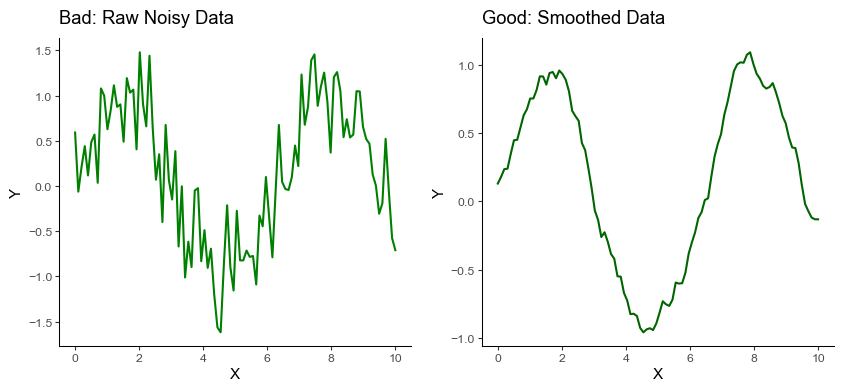

In [12]:
# Data
np.random.seed(SEED)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.35, 100)

df = pd.DataFrame({"x": x, "y": y})

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot(
    x="x",
    y="y",
    title="Bad: Raw Noisy Data",
    xlabel="X",
    ylabel="Y",
    legend=False,
    color="green",
    ax=ax[0],
)

# Moving average smoothing
window_size = 10
smoothed_y = np.convolve(
    df["y"],
    np.ones(window_size) / window_size,
    mode="same",
)
df["smoothed_y"] = smoothed_y

# Good Example
df.plot(
    x="x",
    y="smoothed_y",
    title="Good: Smoothed Data",
    xlabel="X",
    ylabel="Y",
    legend=False,
    color="darkgreen",
    ax=ax[1],
)

# Save plot
if SAVE_IMAGES:
    plt.savefig(image_path / "smooth.png", bbox_inches="tight", dpi=200)

plt.show()